## Descrição

Esses dados contêm informações relacionadas ao fator responsável pelo ataque cardíaco. Os dados classificam se os pacientes têm doenças cardíacas ou não de acordo com suas características.
Essa análise tem como objetivo realizar investigações iniciais sobre os dados, de modo a descobrir padrões, detectar anomalias e testar hipóteses.

#### Explicação das Colunas

1. Age - idade em anos

2. Sex - (1 = masculino; 0 = feminino)

3. CP  - tipo de dor no peito
        0: Angina típica: dor no peito relacionada à diminuição do suprimento de sangue ao coração
        1: angina atípica: dor no peito não relacionada ao coração
        2: Dor não anginosa: tipicamente espasmos esofágicos (não relacionados ao coração)
        3: Assintomático: dor no peito sem sinais de doença
    
4. TRESTBPS - pressão arterial em repouso (em mm Hg na admissão ao hospital) acima de 130-140 é normalmente motivo de preocupação

5. CHOL - colesterol sérico em mg/dl
        .soro = LDL + HDL + .2 * triglicerídeos
        .acima de 200 é motivo de preocupação

6. FPS - (açúcar no sangue em jejum > 120 mg/dl) (1 = verdadeiro; 0 = falso)
        .> 126' mg/dL sinaliza diabetes

7. RESTECH - resultados eletrocardiográficos em repouso
        .0: nada a notar
        .1: Anormalidade da onda ST-T
            .pode variar de sintomas leves a problemas graves
            .sinaliza batimento cardíaco não normal
        .2: Hipertrofia ventricular esquerda possível ou definitiva
            .Câmara de bombeamento principal do coração ampliado

8. THALACH - frequência cardíaca máxima alcançada 

9. EXANG - angina induzida por exercício (1 = sim; 0 = não)

10. OLDPEAK - depressão de ST por exercício em relação ao repouso.

11. SLOPE - a inclinação do segmento ST de pico do exercício
        .0: Upsloping: melhor frequência cardíaca com exercício (incomum)
        .1: Flatsloping: mudança mínima (coração saudável típico)
        .2: Downslopins: sinais de coração não saudável

12. CA - número de vasos principais (0-3) coloridos por fluorosopia
        .vaso colorido significa que o médico pode ver o sangue passando
        .quanto mais circulação sanguínea, melhor (sem coágulos)

13. THAL - resultado de estresse com tálio
        .1,3: normal
        .6: fixed defect: used to be defect but ok now
        .7: reversable defect: no proper blood movement when excercising

14. TARGET - tem doença ou não (1 = sim, 0 = não)

In [1]:
!pip install mpld3

     |████████████████████████████████| 890kB 11.4MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.2-cp36-none-any.whl size=200618 sha256=97493cf9804a2921d5f052f65056ef9bc27aafbbf3bedbd895f0603ab9bb453d
  Stored in directory: /root/.cache/pip/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
Successfully built mpld3


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import mpld3 as mpl


from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics 

In [ ]:
from google.colab import files
files.upload()

In [4]:
df = pd.read_csv('./heart.csv')
df.head() # mostra as primeiras 5 linhas do arquivo

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
!pip install sweetviz

     |████████████████████████████████| 15.1MB 315kB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [8]:
import sweetviz as sv

relatorio = sv.analyze(df)
relatorio.show_html() 


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['sex']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: sex, 



In [16]:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['age']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: age, 



In [17]:
y = df['target']   

list = ['target']
x = df.drop(list,axis = 1 ) 


x.head()

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,3,145,233,1,0,150,0,2.3,0,0,1
1,2,130,250,0,1,187,0,3.5,0,0,2
2,1,130,204,0,0,172,0,1.4,2,0,2
3,1,120,236,0,1,178,0,0.8,2,0,2
4,0,120,354,0,1,163,1,0.6,2,0,2


In [43]:
y = y.replace("B", 0)  
y = y.replace("M", 1)


In [44]:
from sklearn.feature_selection import RFE
x_names= x.columns

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf_rf_2 = RandomForestClassifier(random_state=43)      
rfe = RFE(estimator=clf_rf_2, n_features_to_select=16, step=1)
rfe = rfe.fit(x_train, y_train)

In [45]:
print('Chosen best 16 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 16 feature by rfe: Index(['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


Recall is:  0.7912087912087912
Accuracy is:  0.7912087912087912
F1 score is:  0.7912087912087912


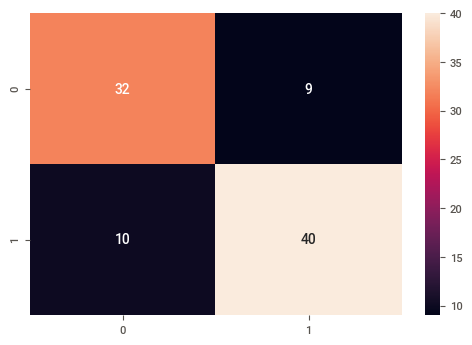

In [46]:
recall = recall_score(y_test,rfe.predict(x_test), average='micro')
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,rfe.predict(x_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,rfe.predict(x_test), average='micro')
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,rfe.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

print(x_train.shape)  

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x_train, y_train)
print(clf.feature_importances_)  

model = SelectFromModel(clf, prefit=True)

x_new = model.transform(x_train)
x_test_new = model.transform(x_test) 


x_new.shape

(212, 11)
[0.11738113 0.07732101 0.07537106 0.0218402  0.03557653 0.09246321
 0.1402454  0.09202531 0.0681117  0.15614922 0.12351523]


(212, 6)

In [48]:
model=RandomForestClassifier(n_estimators=100)

In [49]:
model.fit(x_new,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
prediction=model.predict(x_test_new)
acc = metrics.accuracy_score(prediction,y_test)
prec = metrics.precision_score(prediction,y_test)
rec = metrics.recall_score(prediction,y_test)
roc = metrics.roc_auc_score(prediction,y_test)


print("RandomForest - AUC: ", roc, "prec: ", prec, "rec: ", rec, "acc: ", acc)

RandomForest - AUC:  0.7698067632850242 prec:  0.74 rec:  0.8222222222222222 acc:  0.7692307692307693


In [51]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_new,y_train)

In [52]:
prediction = clf.predict(x_test_new)

acc = metrics.accuracy_score(prediction,y_test)
prec = metrics.precision_score(prediction,y_test)
rec = metrics.recall_score(prediction,y_test)
roc = metrics.roc_auc_score(prediction,y_test)


print("RandomForest - AUC: ", roc, "prec: ", prec, "rec: ", rec, "acc: ", acc)

RandomForest - AUC:  0.7038647342995169 prec:  0.68 rec:  0.7555555555555555 acc:  0.7032967032967034


In [53]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh = neigh.fit(x_new,y_train)

In [54]:
prediction=neigh.predict(x_test_new)
acc = metrics.accuracy_score(prediction,y_test)
prec = metrics.precision_score(prediction,y_test)
rec = metrics.recall_score(prediction,y_test)
roc = metrics.roc_auc_score(prediction,y_test)


print("RandomForest - AUC: ", roc, "prec: ", prec, "rec: ", rec, "acc: ", acc)

RandomForest - AUC:  0.7352352352352352 prec:  0.8 rec:  0.7407407407407407 acc:  0.7362637362637363


In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

mlp = MLPClassifier(random_state=1, max_iter=300)
mlp = mlp.fit(x_new,y_train)

In [56]:
prediction=mlp.predict(x_test_new)
acc = metrics.accuracy_score(prediction,y_test)
prec = metrics.precision_score(prediction,y_test)
rec = metrics.recall_score(prediction,y_test)
roc = metrics.roc_auc_score(prediction,y_test)

print("RandomForest - AUC: ", roc, "prec: ", prec, "rec: ", rec, "acc: ", acc)

RandomForest - AUC:  0.8446341463414633 prec:  0.86 rec:  0.86 acc:  0.8461538461538461


In [58]:
def classification_model(model,data,prediction_input,output):

    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
  
    predictions = model.predict(data[prediction_input])
  
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
 
    
    kf = KFold(data.shape[0], n_folds=5)

    error = []
    for train, test in kf:

        train_X = (data[prediction_input].iloc[train,:])

        train_y = data[output].iloc[train]

        model.fit(train_X, train_y)
    
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))

        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

## Conclusão

No começo foi feito a exploração de dados, onde foi verificado os dados ausentes e recursos que não serão relevantes. Durante este processo, foi usado o plotly, seaborn, pandas, sweetviz e matplotlib para fazer as visualizações.

Durante a parte de pré-processamento de dados foi feita a seleção de atributos, necessária para eliminar atributos desnecessários, que poderão prejudicar o desempenho dos algorimos. Por fim, alguns classificadores foram rodados para comparar resultados. 